# Bootstrap


In [1]:
import numpy as np
#import os
#os.getcwd() 
from base import EnsembleNetwork
import dataset_creation 
import importlib
importlib.reload(dataset_creation)

#import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [15, 5]

%matplotlib inline

In [2]:
ld = dataset_creation.LinearDataset()

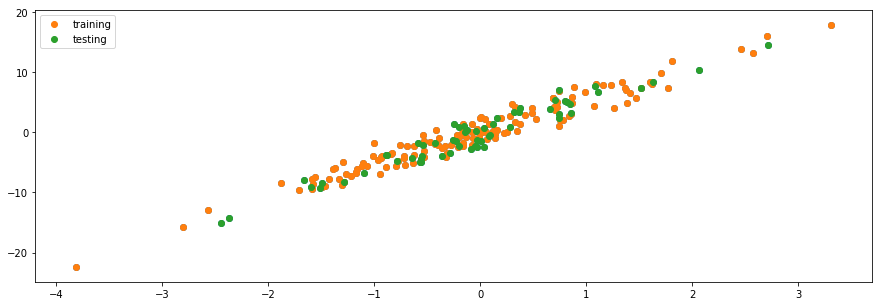

In [3]:
ld.plot_dataset()

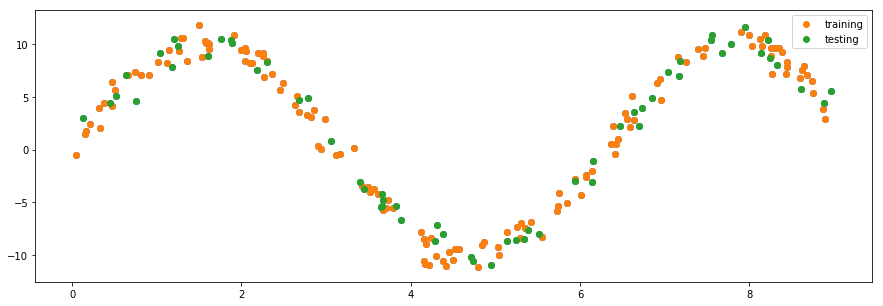

In [4]:
nd = dataset_creation.NonlinearDataset()
nd.plot_dataset()



# Bootstrap Through Time

In [5]:
class BootstrapThroughTimeBobStrap(object):
    
    def __init__(self,ensemble=None,num_features = None,num_epochs=100):
        self.num_features = num_features or 1
        self.ensemble_list = ensemble or [EnsembleNetwork] *10
        self.num_epochs = num_epochs
        self.initialise_ensemble()
        
    def initialise_ensemble(self):
        self.ensemble = [member(num_features=self.num_features,seed=i+42,num_epochs=self.num_epochs) for i,member in enumerate(self.ensemble_list)]
        
    def fit(self, X, y):
        '''This is where we build in the Online Bootstrap'''
        for estimator in self.ensemble:
            estimator.fit(X,y)
            
    def get_prediction_list(self,X):
        pred_list = []
        for estimator in self.ensemble:
            prediction = estimator.predict(X)
            pred_list.append(prediction)
        return pred_list
      

    def predict(self, X):
        pred_list = self.get_prediction_list(X)
        predictive_mean = np.mean(pred_list, 0)

        return predictive_mean
    
    def predict_std(self,X):

        pred_list = self.get_prediction_list(X)
        predictive_uncertainty = np.std(pred_list, 0)

        return predictive_uncertainty
    
    def get_mean_and_std(self,X):
        pred_list = self.get_prediction_list(X)
        pred_mean = np.mean(pred_list,axis=0)
        pred_std = np.std(pred_list,axis=0)
        return pred_mean, pred_std

In [6]:
bob = BootstrapThroughTimeBobStrap()

In [7]:
import visualisation 
importlib.reload(visualisation)

<module 'visualisation' from '/Users/thomas/Documents/Master-Thesis/new_version/visualisation.py'>

/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


'this run of 100 epochs and 3 metaepochs took 450.3688311576843s'

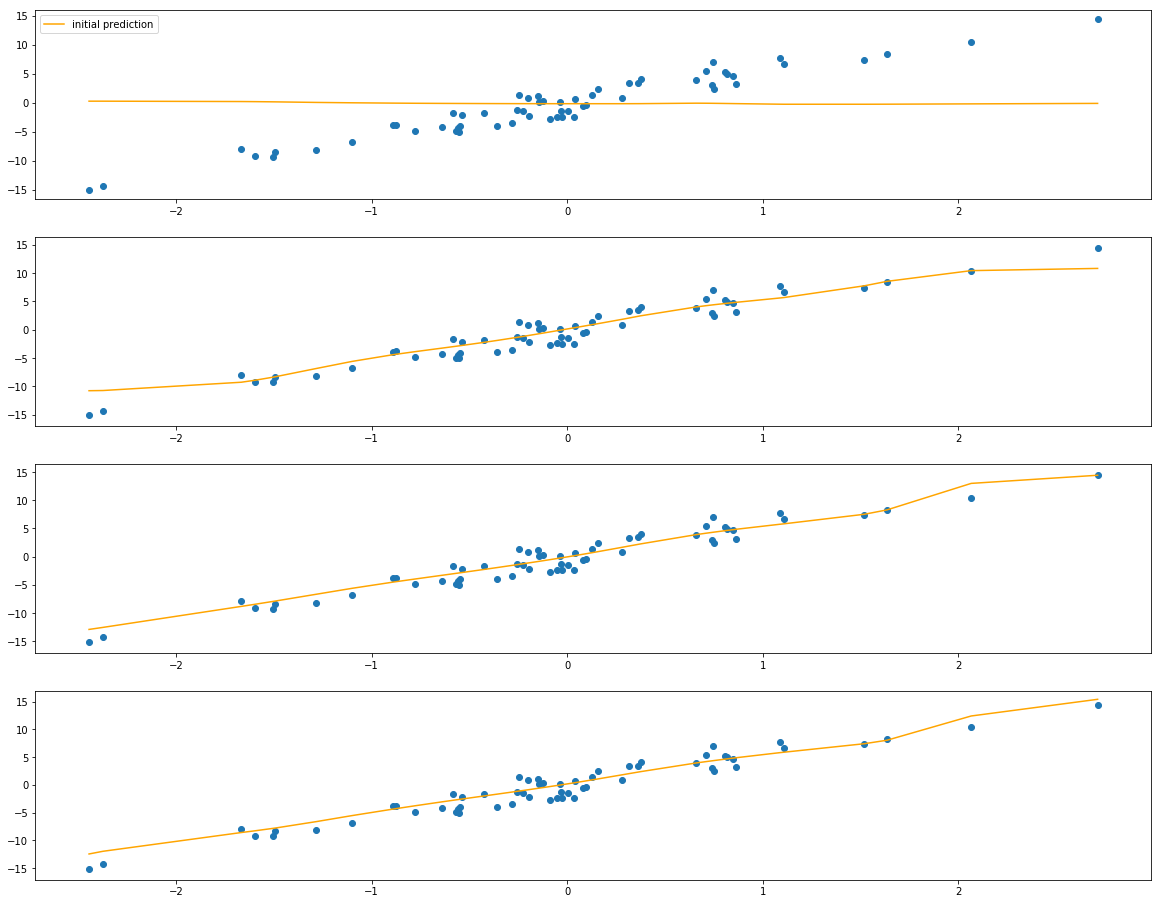

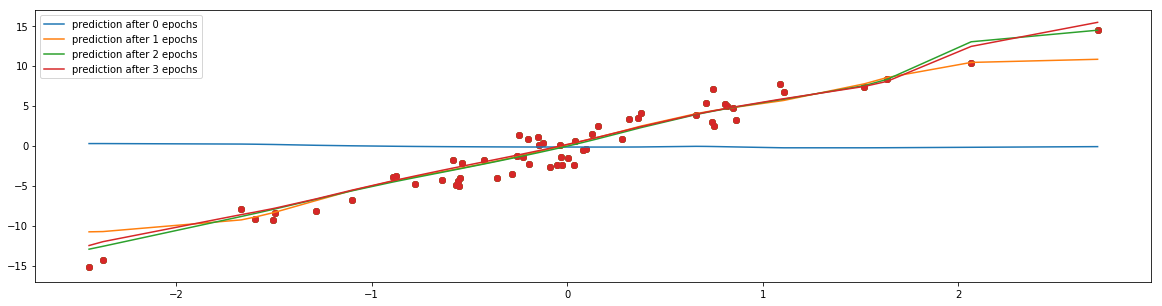

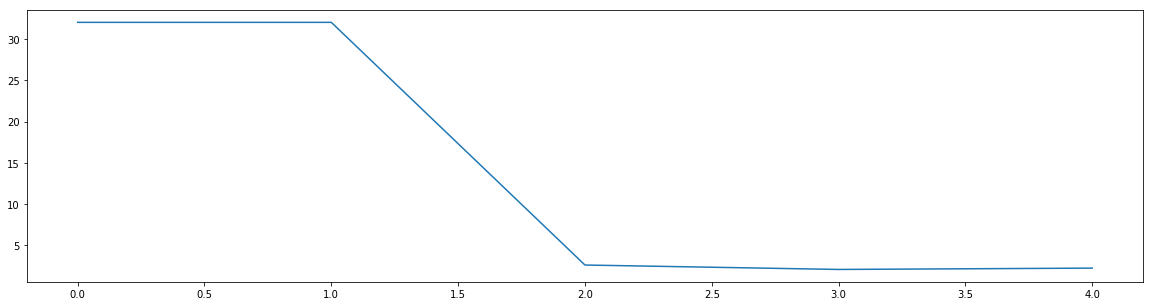

In [8]:
#net = EnsembleNetwork(num_epochs=25)#num_epochs = num_epochs,learning_rate=learning_rate,adversarial=False,num_neurons=num_neurons)
visualisation.visualise(bob,dataset_creation.LinearDataset)

/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


'this run of 100 epochs and 3 metaepochs took 431.26571798324585s'

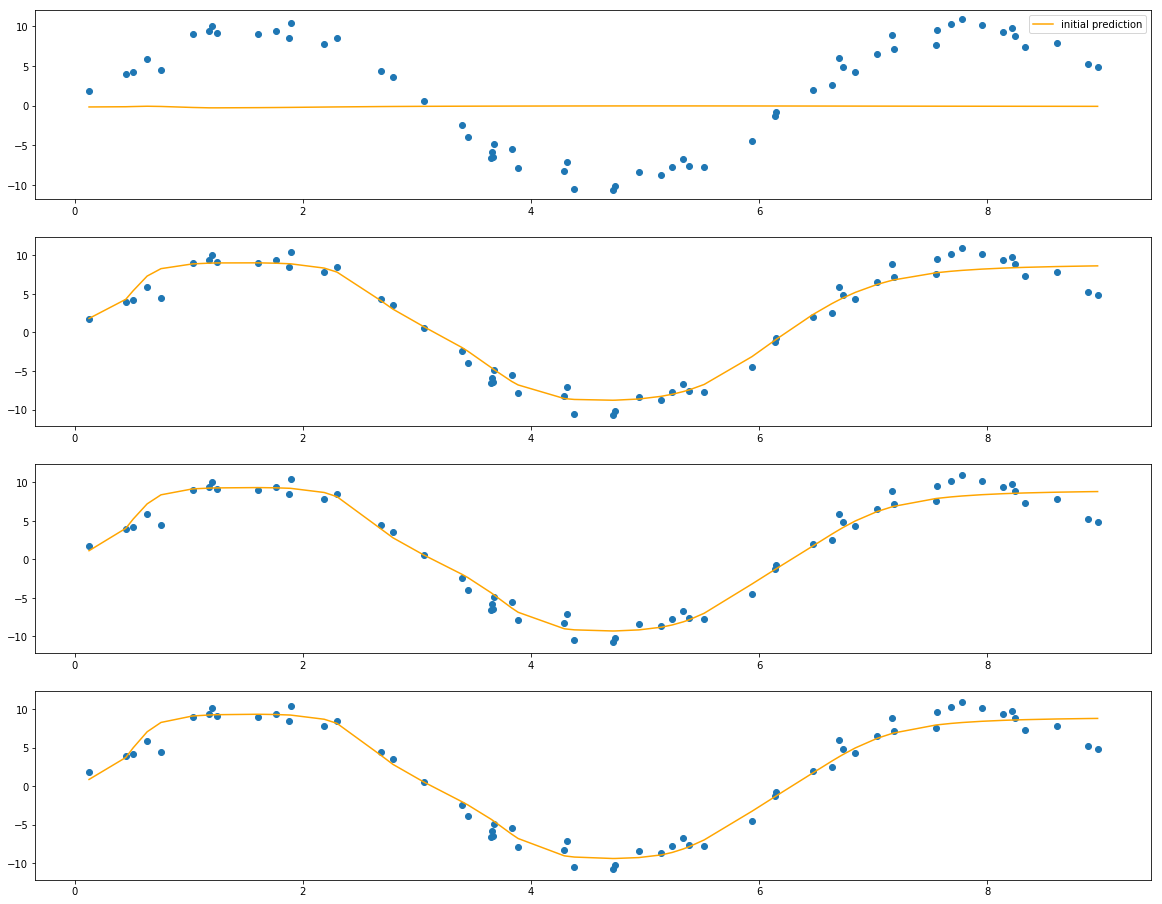

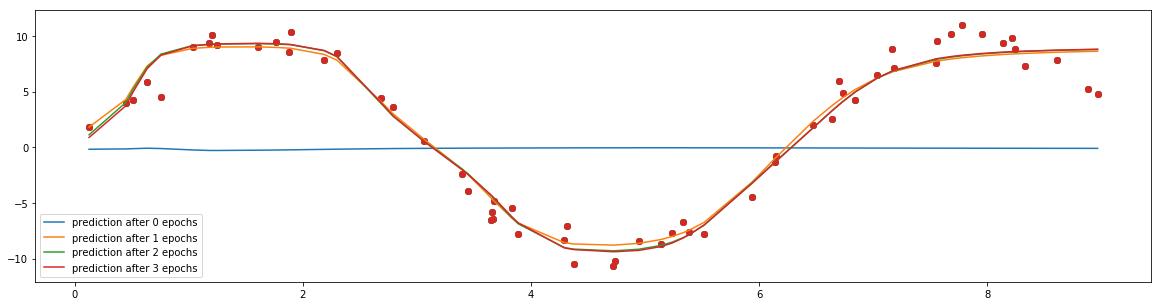

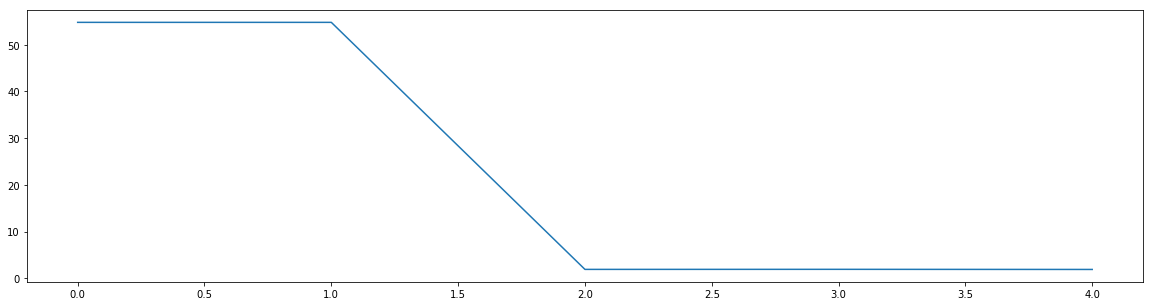

In [9]:
bill = BootstrapThroughTimeBobStrap()
visualisation.visualise(bill,dataset_creation.NonlinearDataset)

In [10]:
import visualisation 
importlib.reload(visualisation)

<module 'visualisation' from '/Users/thomas/Documents/Master-Thesis/new_version/visualisation.py'>

'this run of 100 epochs and 3 metaepochs took 291.35536909103394s'

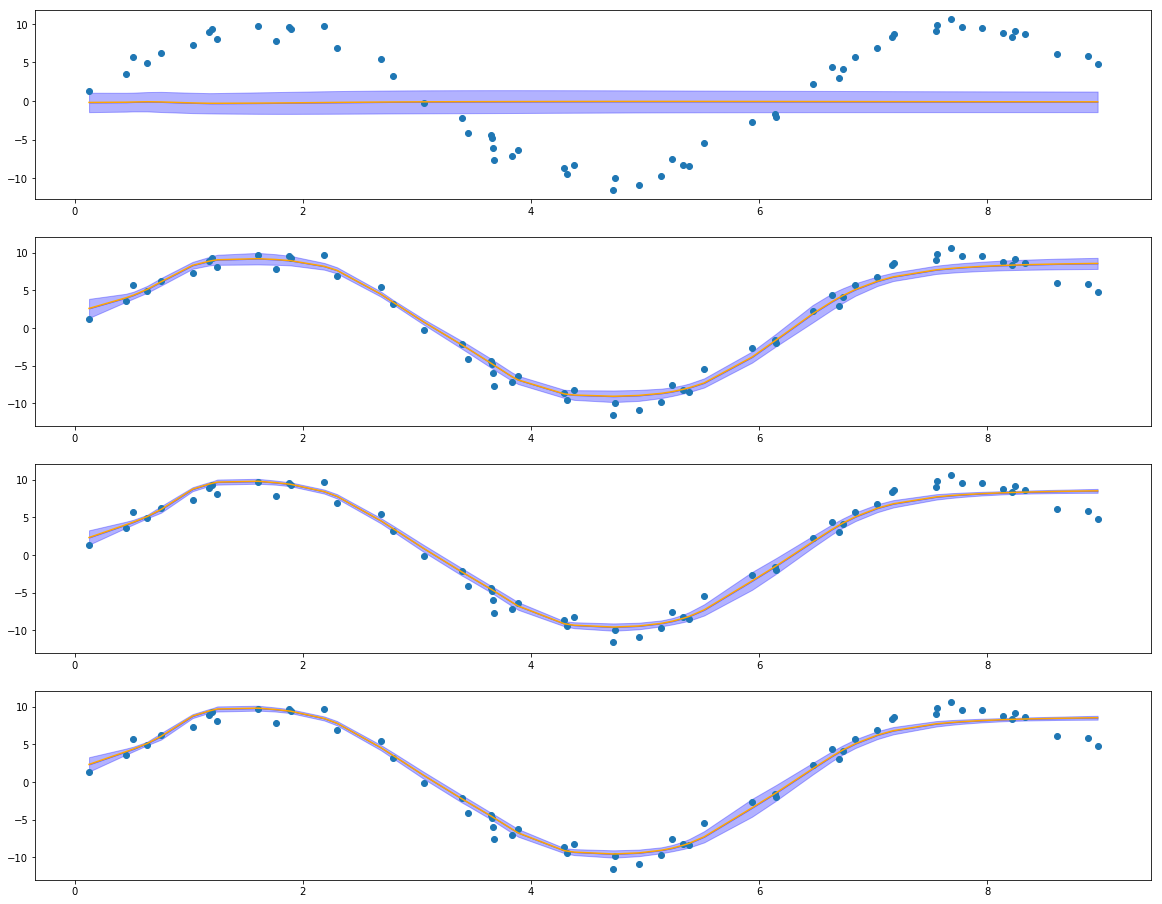

In [11]:
riker  = BootstrapThroughTimeBobStrap()

visualisation.visualise_uncertainty(riker,dataset_creation.NonlinearDataset)